# Graphic Control Charts 



The snipet below show several examples for graphing control charts. 

## Shewhart Chart (R-Chart)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('practice_ex_8.csv')
df.head()
m = 20
i = 1
R_accum = 0
R_samples = [] # define an empty array
while i <= m:
    R = df.loc[df['Sample Number']==i,'Voltage'].max()-df.loc[df['Sample Number']==i,'Voltage'].min()
    R_samples.append(R) # store the values in the array
    R_accum = R_accum+R
    i += 1
CL_R = R_accum/m
UCL_R = 2.282*CL_R 
LCL_R = 0 
ucl_line = np.full(m,UCL_R) # create an array with all elements equal to the UCL
lcl_line = np.full(m,LCL_R) # create an array with all elements equal to the UCL
cl_line = np.full(m,CL_R) # create an array with all elements equal to the CL
plt.plot(R_samples,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

# These three lines help to set the labels of the x-axis to go from 1 to m
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('R chart for voltage')
plt.show()

<Figure size 640x480 with 1 Axes>

## CUSUM Chart

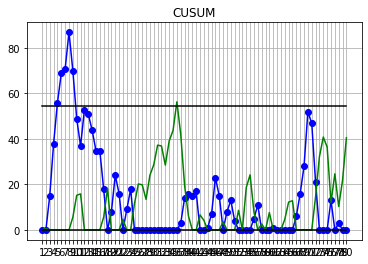

In [2]:
df = pd.read_csv('practice_ex_11.csv')
df.head()
Rs = []
Rs.append(0) # set first entry to 0 so the indices do not mix later
for i in range(1,80):
    R = np.abs(df['Temperature'][i]-df['Temperature'][i-1])
    Rs.append(R)
    i += 1
CL_R = np.sum(Rs)/79
CL_x_bar = df['Temperature'].mean()
sigma = CL_R/1.128
mu0 = CL_x_bar
delta = 1
k = 0.5
h = 4.77
K = k*sigma
H = h*sigma
ci_p = []
ci_n = []
for i in range(0,80):
    if i==0:
        ci_p.append(max(0,df['Temperature'][i] - mu0 - K ))
        ci_n.append(max(0,-df['Temperature'][i] + mu0 - K ))
    else:
        ci_p.append(max(0,df['Temperature'][i] - mu0 - K + ci_p[i-1]))
        ci_n.append(max(0,-df['Temperature'][i] + mu0 - K + ci_n[i-1]))
    i += 1
m=80
ucl_line = np.full(m,H) # create an array with all elements equal to the UCL
lcl_line = np.full(m,0) # create an array with all elements equal to the UCL
plt.plot(ci_p,marker="o",color='b')
plt.plot(ci_n,color='g')
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')

# These three lines help to set the labels of the x-axis to go from 1 to m
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('CUSUM')
plt.show()

## EWMA Chart

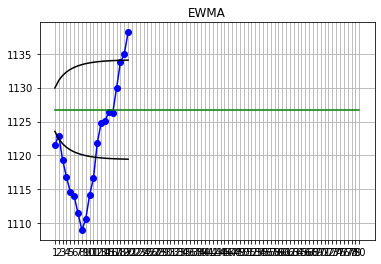

In [3]:
df = pd.read_csv('practice_ex_12.csv')
mu = df['Weight'].mean()
lam = 0.1
L = 2.814
z = []
for i in range(0,20):
    if i==0:
        z.append(lam * df['Weight'][i] + (1-lam) * mu )
    else:
        z.append(lam * df['Weight'][i] + (1-lam) * z[i-1])
df['UCL'] = mu + L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))
df['LCL'] = mu - L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))
plt.plot(z,marker="o",color='b')
plt.plot(df['UCL'],color='k')
plt.plot(df['LCL'],color='k')
cl_line = np.full(m,mu) # create an array with all elements equal to the UCL
plt.plot(cl_line,color='g')
# These three lines help to set the labels of the x-axis to go from 1 to m
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 
plt.grid(True)
plt.title('EWMA')
plt.show()